<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/Actividad2_Febrero_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 🚀 Actividad 2: ¡A Predecir el Futuro con Datos!

## Modelos Predictivos y Análisis de Supervivencia

¡Hola, investigadores! 👩‍💻👨‍💻 ¡Bienvenido/a a tu tercera misión! En este Colab, vamos a sumergirnos en dos de las herramientas más potentes de la bioestadística: la **regresión multivariable** y el **análisis de supervivencia**.

¿El objetivo? Aprender a predecir resultados (como costes médicos) y a analizar el tiempo hasta que ocurre un evento importante (como la supervivencia de un paciente). ¡Prepárate para hacer que los datos hablen! 🗣️📊

### La Estructura de la Aventura

Esta actividad se divide en dos grandes desafíos, cada uno con su propio conjunto de datos:

1.  **Caso 1: 🏥 Prediciendo Costes de Seguros Médicos.** Te pondrás en la piel de un analista para una aseguradora. Tu misión: usar un dataset real para construir un modelo que prediga los costes de los seguros. Compararás un modelo de regresión lineal con la potencia de un Random Forest para descubrir qué factores (como la edad o el tabaquismo) disparan los precios.

2.  **Caso 2: ❤️‍🩹 Análisis de Supervivencia en Pacientes Críticos.** Aquí el reto es aún más importante. Analizarás datos del famoso estudio multicéntrico SUPPORT para entender mejor la supervivencia de pacientes en estado crítico. Aprenderás a usar las curvas de Kaplan-Meier y los modelos de Cox para identificar factores que influyen en el pronóstico de los pacientes.

### Tus Entregables 📝

Como en las misiones anteriores, la entrega tiene dos partes:

* **Este Cuaderno de Colab:** Completa todo el código y responde a las preguntas de reflexión directamente aquí. ¡Asegúrate de que todo se ejecute correctamente de principio a fin!
* **Un Informe Técnico Final:** Elige **SOLO UNO** de los dos casos (el que más te haya gustado o desafiado) y redacta un informe técnico profesional, siguiendo la plantilla y el rigor que hemos practicado.

¡Mucha suerte y a disfrutar del análisis! Estamos aquí para ayudarte si te atascas. ¡Vamos a ello!



## Desafío 1: ¿Cuánto Costará el Seguro Médico? 🩺💰

### El Contexto

¡Primer desafío a la vista! Imagina que eres un científico de datos en una compañía de seguros. Tu reto es crucial: **predecir cuánto gastará cada cliente en cuidados médicos durante un año**.

Si tus predicciones son buenas, la empresa puede ofrecer primas de seguro más justas, gestionar mejor su dinero y, lo más importante, entender qué factores (como el estilo de vida o la edad) influyen más en los costes de salud.

Tu misión se divide en dos partes:
1.  **El enfoque clásico (y explicable):** Construirás un modelo de **Regresión Lineal Multivariable** para entender el impacto exacto de cada factor en el coste.
2.  **El poder del Machine Learning:** Luego, usarás un modelo más potente, un **Random Forest**, para ver si podemos mejorar la precisión de las predicciones. ¿Qué enfoque ganará?

### El Dataset: Costes Médicos Personales

Para este análisis, vamos a usar un dataset público muy conocido con información de 1338 personas. La celda de código de abajo cargará los datos en un DataFrame de pandas llamado `df_regresion` para que puedas empezar a trabajar.

In [ ]:
import pandas as pd
import numpy as np

# --- Carga de datos desde una URL pública ---
url_regresion = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df_regresion = pd.read_csv(url_regresion)

# --- Muestra de los datos cargados ---
print("--- CASO 1: DATOS DE COSTES DE SEGUROS ---")
print("Dataset cargado correctamente.")
print("A continuación se muestran las primeras 5 filas:")
from IPython.display import display
display(df_regresion.head())

print("\nInformación general del DataFrame:")
df_regresion.info()


--- CASO 1: DATOS DE COSTES DE SEGUROS ---
Dataset cargado correctamente.
A continuación se muestran las primeras 5 filas:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Claro, aquí tienes una propuesta con un diseño más visual y amigable, ideal para un cuaderno de Colab.

***

## **Fase 1: Caracterización del Perfil de Costes** 🩺

### **1.1 Distribución de los Costes Médicos**

En este primer paso, vamos a actuar como detectives de datos para entender la naturaleza de los costes sanitarios en nuestro conjunto de datos.

#### **❓ Pregunta de Investigación**
¿Cómo se distribuyen los costes médicos en nuestra población? ¿Existe una minoría de casos con costes extremadamente altos que dominen el gasto total?

---

#### **💬 Prompt para Gemini**
Copia y pega la siguiente instrucción en una celda de Gemini. Es la pregunta que le haremos a nuestro asistente de IA.

> Analiza la distribución de la variable `charges` del dataframe `df`. Crea un histograma con curva de densidad (KDE) y calcula estadísticas descriptivas completas: media, mediana, desviación estándar, percentiles (25, 50, 75, 90, 95) y coeficiente de asimetría.
>
> Basándote en estos resultados, explícame si esta distribución sigue un patrón normal y qué implicaciones tiene para la gestión de riesgos financieros en salud.

---

#### **💡 Pistas para tu Interpretación**
Una vez que Gemini te dé los resultados, fíjate en estos puntos clave para tu análisis:

* **Relación Media-Mediana:** Si la **media** es mucho más alta que la **mediana**, es una señal clara de la presencia de **valores atípicos** (casos de coste extremo) que están sesgando los datos.
* **Percentil 95 vs. Media:** Compara el valor del percentil 95 con la media. Esta diferencia te mostrará el enorme impacto que tienen ese 5% de casos más costosos sobre el gasto total.
* **Asimetría (Skewness):** Un valor de asimetría positivo y alto confirma lo que vemos en el gráfico: la mayoría de los pacientes tienen costes bajos, pero existe una "cola larga" de casos excepcionalmente caros.

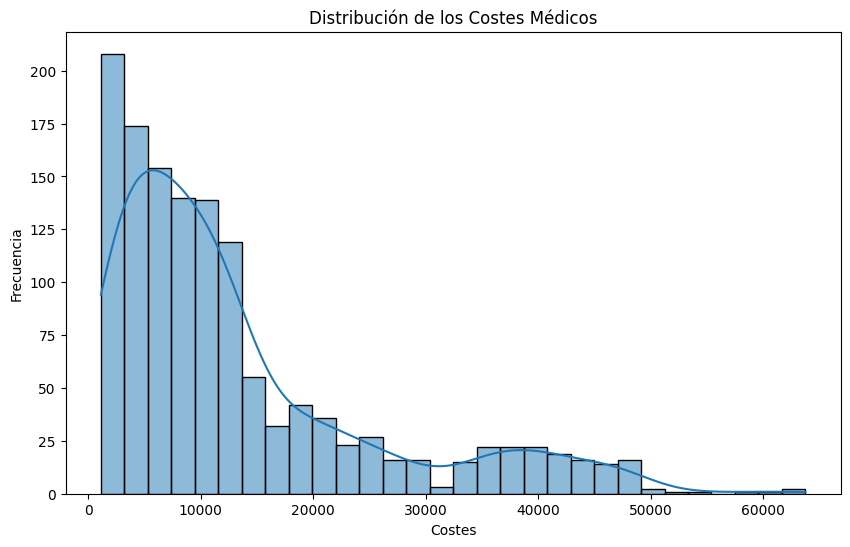


Estadísticas descriptivas de la variable 'charges':


,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
90%,34831.719700
95%,41181.827787
max,63770.428010



Coeficiente de asimetría de 'charges': 1.52

Interpretación de la distribución:
La distribución de 'charges' está sesgada positivamente (hacia la derecha). Esto indica la presencia de valores atípicos altos (costes elevados). No sigue un patrón normal.

Implicaciones para la gestión de riesgos financieros en salud:
Un sesgo positivo pronunciado, como se observa en la distribución de 'charges', significa que una pequeña proporción de asegurados genera costes significativamente más altos que la mayoría.
Para una aseguradora, esto implica un riesgo financiero considerable. La gestión de riesgos no puede basarse únicamente en promedios, ya que la media está fuertemente influenciada por estos casos extremos.
Es crucial identificar los factores que contribuyen a estos costes elevados (como se hará en los siguientes pasos) para poder ajustar las primas de manera más precisa, gestionar programas de prevención para grupos de alto riesgo y asegurar la sostenibilidad financiera de la aseguradora

In [ ]:
################################################################################
# Este código ha sio generado automáticamente por gémini con el prompt anterior#
################################################################################
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma con curva de densidad (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df_regresion['charges'], kde=True, bins=30)
plt.title('Distribución de los Costes Médicos')
plt.xlabel('Costes')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas de la variable 'charges':")
display(df_regresion['charges'].describe(percentiles=[.25, .5, .75, .90, .95]))

# Coeficiente de asimetría
skewness = df_regresion['charges'].skew()
print(f"\nCoeficiente de asimetría de 'charges': {skewness:.2f}")

# Interpretación
print("\nInterpretación de la distribución:")
if abs(skewness) < 0.5:
    print("La distribución de 'charges' es aproximadamente simétrica y podría seguir un patrón normal.")
elif skewness > 0.5:
    print("La distribución de 'charges' está sesgada positivamente (hacia la derecha). Esto indica la presencia de valores atípicos altos (costes elevados). No sigue un patrón normal.")
elif skewness < -0.5:
    print("La distribución de 'charges' está sesgada negativamente (hacia la izquierda). Esto indica la presencia de valores atípicos bajos (costes bajos). No sigue un patrón normal.")

print("\nImplicaciones para la gestión de riesgos financieros en salud:")
print("Un sesgo positivo pronunciado, como se observa en la distribución de 'charges', significa que una pequeña proporción de asegurados genera costes significativamente más altos que la mayoría.")
print("Para una aseguradora, esto implica un riesgo financiero considerable. La gestión de riesgos no puede basarse únicamente en promedios, ya que la media está fuertemente influenciada por estos casos extremos.")
print("Es crucial identificar los factores que contribuyen a estos costes elevados (como se hará en los siguientes pasos) para poder ajustar las primas de manera más precisa, gestionar programas de prevención para grupos de alto riesgo y asegurar la sostenibilidad financiera de la aseguradora.")

In [ ]:
# ------------------------------------------------------------------------------
# AÑADE CON LA AYUDA DE GEMINI LAS CELDAS QUE NECESITES
# ------------------------------------------------------------------------------



## Desafío 2: Factores Clave en la Supervivencia de Pacientes Críticos 🧑‍⚕️❤️

### El Contexto

Ahora nos enfrentamos a un reto de gran importancia clínica. Vamos a trabajar con los datos del estudio **SUPPORT**, una investigación masiva que siguió a más de 9,000 pacientes en estado crítico. El objetivo era muy humano: entender mejor su pronóstico para ayudar a médicos, pacientes y familias a tomar decisiones increíblemente difíciles sobre los tratamientos.

Tu misión es usar este valioso conjunto de datos para construir un modelo de supervivencia. Te sumergirás en la información para descubrir qué factores —desde el diagnóstico hasta las variables fisiológicas— están realmente asociados con el tiempo de supervivencia de estos pacientes.

### El Dataset: SUPPORT

Para ello, usaremos una versión pública de este increíble dataset. A diferencia de los datos "perfectos" de los libros de texto, este presenta desafíos del mundo real, como **valores faltantes**.

¡No te preocupes! Esto es completamente normal y una oportunidad perfecta para aprender a manejar datos como lo haría un profesional. La siguiente celda cargará todo en el DataFrame `df_supervivencia`.

In [ ]:
# --- Carga de datos desde la URL proporcionada por el usuario ---
url_supervivencia = 'https://raw.githubusercontent.com/MGensheimer/nnet-survival/refs/heads/master/data/support2.csv'
df_supervivencia = pd.read_csv(url_supervivencia)

# --- Muestra de los datos cargados ---
print("--- CASO 2: DATOS DEL ESTUDIO SUPPORT ---")
print("Dataset cargado correctamente.")
print("A continuación se muestran las primeras 5 filas:")
display(df_supervivencia.head())

print("\nInformación general del DataFrame:")
df_supervivencia.info()

--- CASO 2: DATOS DEL ESTUDIO SUPPORT ---
Dataset cargado correctamente.
A continuación se muestran las primeras 5 filas:


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20 

In [ ]:
# ------------------------------------------------------------------------------
# AÑADE CON LA AYUDA DE GEMINI LAS CELDAS QUE NECESITES
# ------------------------------------------------------------------------------